In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('./images/retinopaty.png')
img_grayscale = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

### Top-hat RMP

In [3]:
def rmp(img, kernel, n):
    cols, rows = tuple(img.shape)
    images = []

    for i in range (1, n + 1):
        M_cw = cv2.getRotationMatrix2D((cols / 2, rows / 2), (i* 360/n), 1)
        rotated = cv2.warpAffine(img, M_cw, (cols,rows))

        opened = cv2.morphologyEx(rotated, cv2.MORPH_OPEN, kernel)

        M_acw = cv2.getRotationMatrix2D((cols / 2, rows / 2), -(i* 360/n), 1)
        opened_rotated = cv2.warpAffine(opened, M_acw, (cols,rows))
        images.append(opened_rotated)
        
    res = np.zeros(resized_img.shape, dtype=int)
    for x in range(0, resized_img.shape[0]):
        for y in range(0, resized_img.shape[1]):
            res[x][y] = max(images, key=lambda im: im[x][y])[x][y]
            
    return res

In [5]:
def resize_img_adaptively(img_gr, img_cnt, dim, interpolation):
    """
    img_gr - original image in grayscale
    img_cnt - max image contour
    """
    (x,y), radius = cv2.minEnclosingCircle(cnt)
            
    x = int(x); y = int(y); radius = int(radius)
    
    if x < radius:
        radius = x
    if y < radius:
        radius = y
    
    crop_img = img_gr[y - radius:y + radius, x - radius:x + radius]
    
    resized = cv2.resize(crop_img, dim, interpolation=interpolation)
    
    return resized

Text(0.5, 1.0, 'Applyed top-hat RMP')

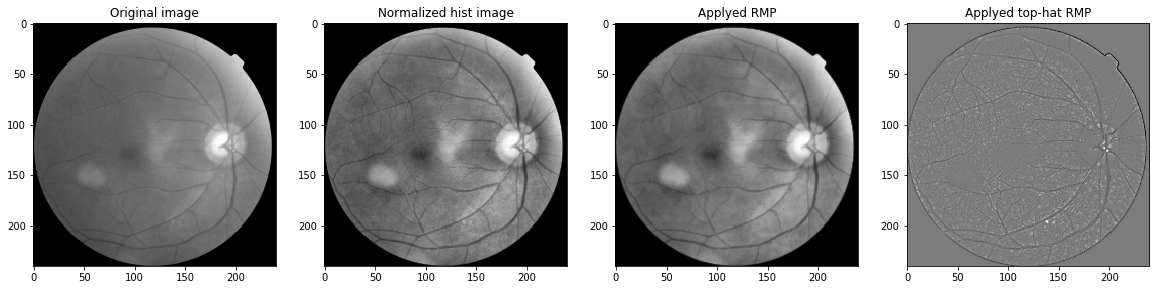

In [7]:
ret, thresh = cv2.threshold(img_grayscale, 0, 255, cv2.THRESH_OTSU)
contours, hierarchy = cv2.findContours(thresh, 1, 2)
cnt = max(contours, key = cv2.contourArea)

resized_img = resize_img_adaptively(img_grayscale, cnt, (240, 240), interpolation=cv2.INTER_AREA)

kernel = np.ones((1,5),np.uint8)
n = 8

img_normalized = np.zeros(resized_img.shape)
img_normalized = cv2.normalize(resized_img,  img_normalized, 0, 255, cv2.NORM_MINMAX)

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
histogram_norm_img = clahe.apply(img_normalized)


res = rmp(histogram_norm_img, kernel, n)
        
fig = plt.figure(figsize=(20, 20))
fig.add_subplot(1, 4, 1)
plt.imshow(resized_img, cmap=plt.cm.gray)
plt.title('Original image')

fig.add_subplot(1, 4, 2)
plt.imshow(histogram_norm_img, cmap=plt.cm.gray)
plt.title('Normalized hist image')

fig.add_subplot(1, 4, 3)
plt.imshow(res, cmap=plt.cm.gray)
plt.title('Applyed RMP')

fig.add_subplot(1, 4, 4)
plt.imshow(histogram_norm_img - res, cmap=plt.cm.gray)
plt.title('Applyed top-hat RMP')